<a href="https://colab.research.google.com/github/Swathi1309/Data_Analytics/blob/main/Predicting%20Income%20Class%20using%20a%20Naive%20Bayes%20Classifier/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Income Class Using a Naive Bayes Classifier

## Importing the required libraries and framework

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, QuantileTransformer
from sklearn.metrics import accuracy_score, plot_confusion_matrix, f1_score, precision_score, recall_score, plot_roc_curve

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## Data loading and cleaning

In [26]:
# Loading dataset
data = pd.read_csv("adult.csv", names=['age','work_class', 'fnlwgt', 'education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'])

# Dropping rows with "?"
index_names = data[data['work_class']==' ?'].index
data.drop(index_names, inplace = True)
index_names = data[data['occupation']==' ?'].index
data.drop(index_names, inplace = True)
index_names = data[data['native_country']==' ?'].index
data.drop(index_names, inplace = True)

# Analysing the distribution of the data
print (data['income'].value_counts())

# Changing the income labels
data['income']=data['income'].map({' <=50K': 0, ' >50K': 1})

 <=50K    22654
 >50K      7508
Name: income, dtype: int64


## Data visualization and analysis

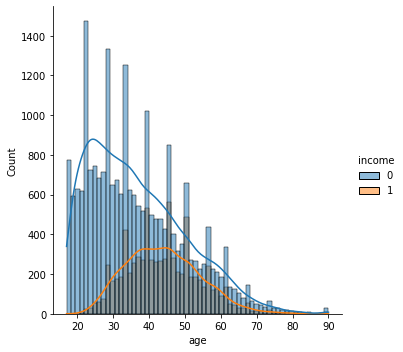

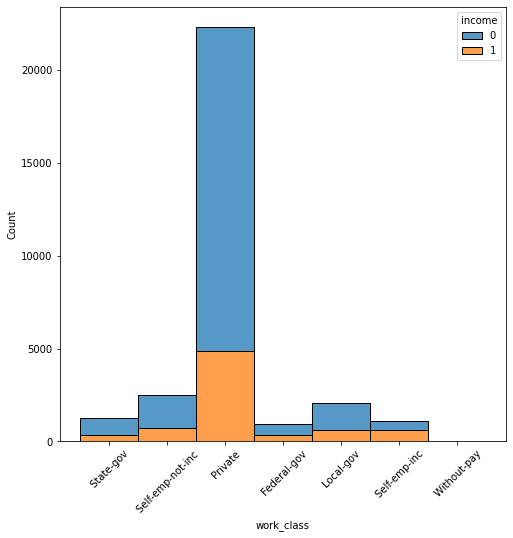

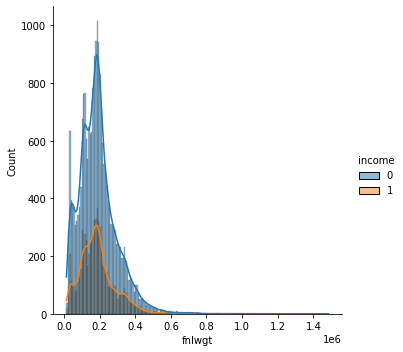

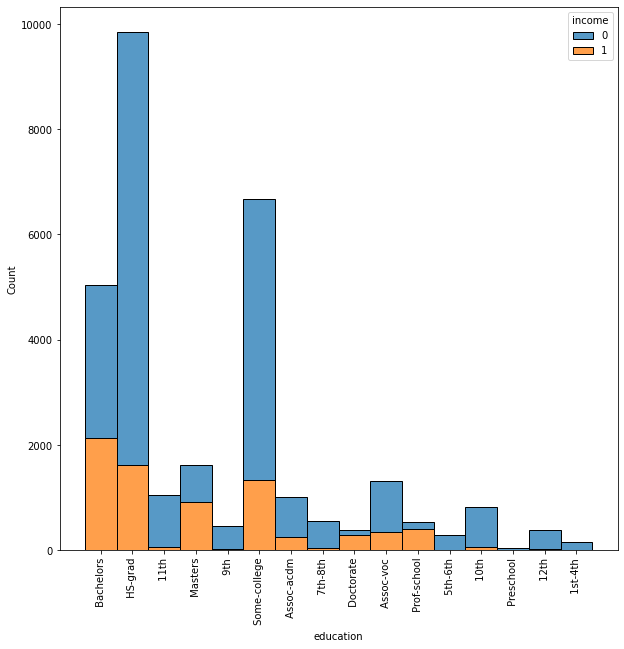

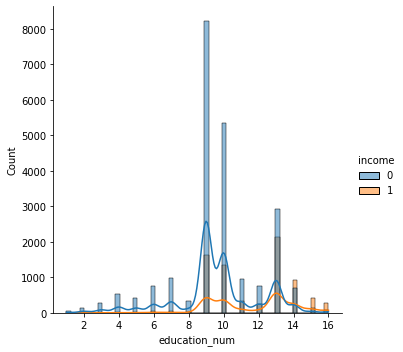

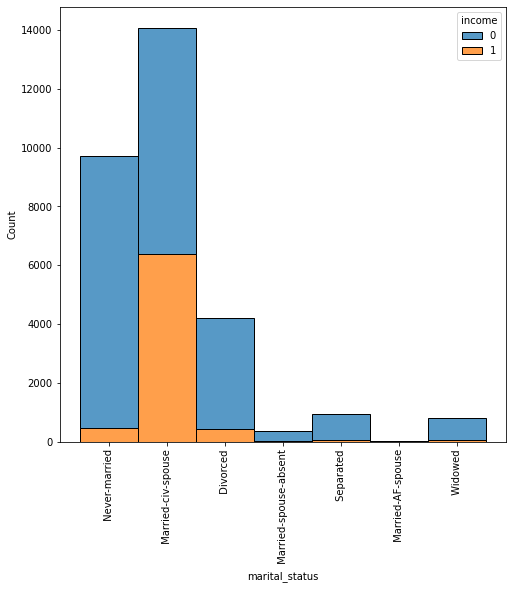

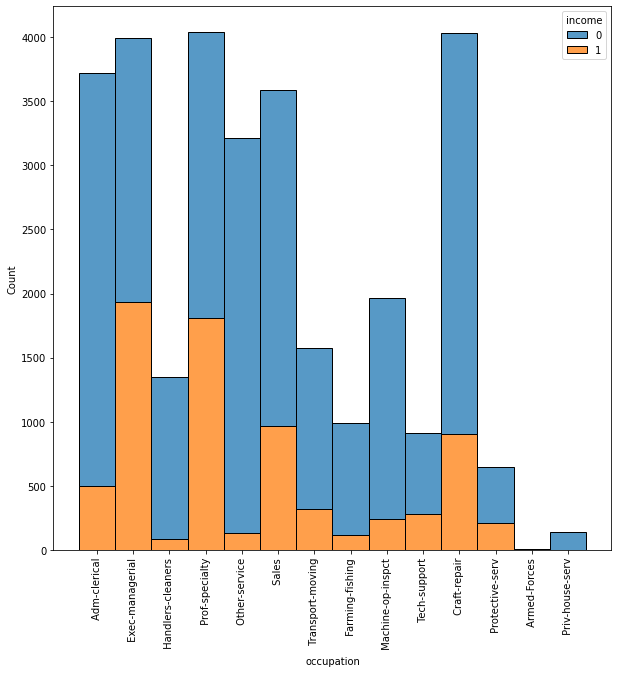

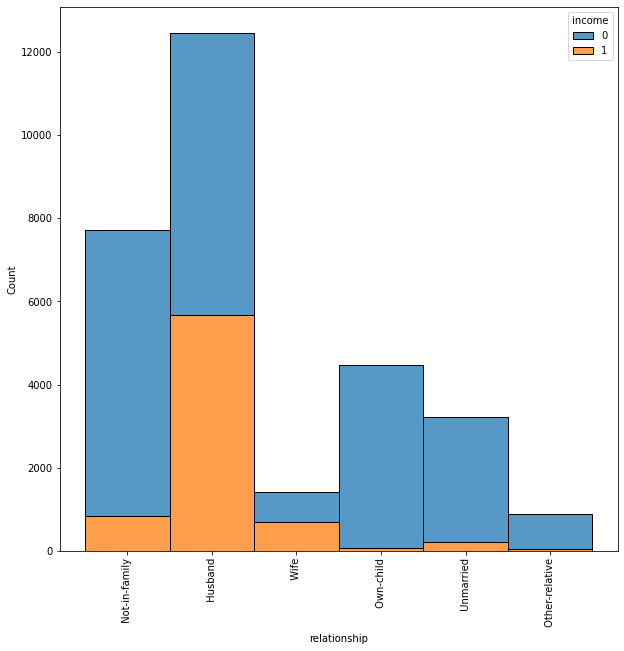

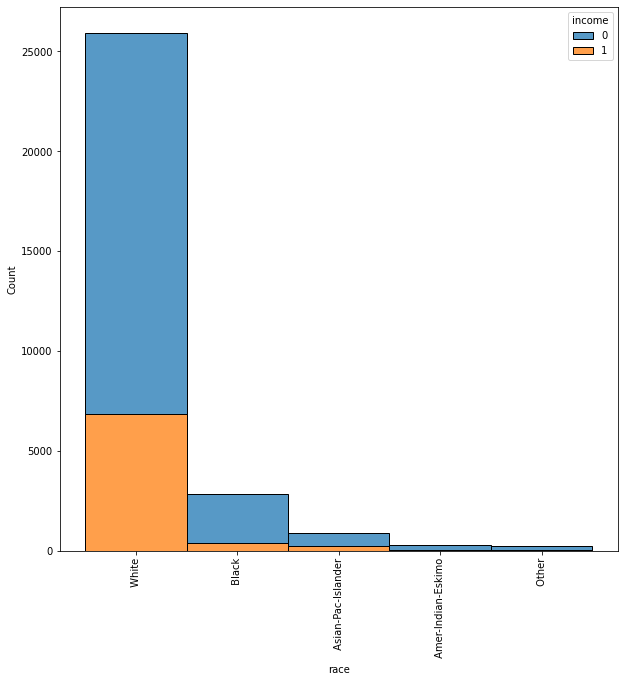

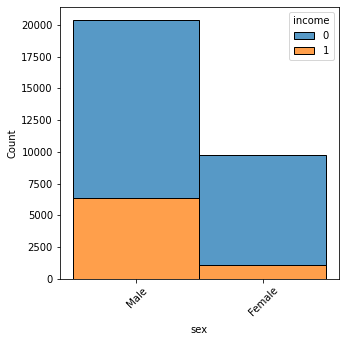

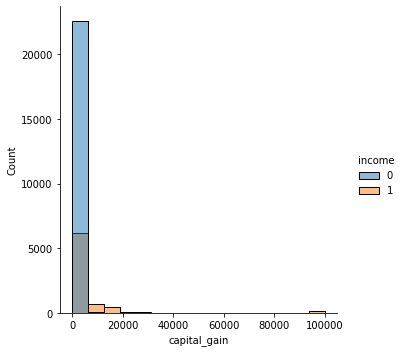

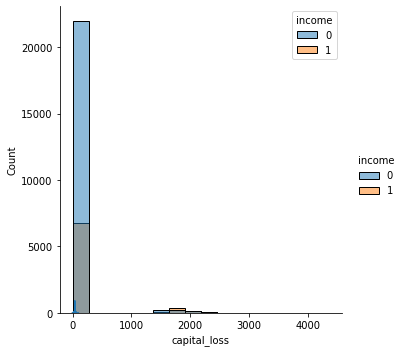

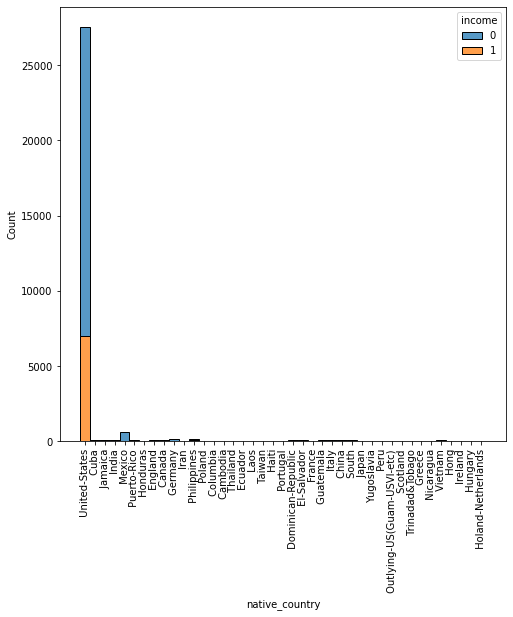

In [27]:
# Plotting the distribution of variables
# Age
sb.displot(data=data, x="age", kde=True, hue="income");

# Income
fig, ax = plt.subplots(figsize=(8,8))
sb.histplot(data=data, x="work_class", hue="income", multiple='stack', ax=ax);
plt.xticks(rotation=45);

# Final Weight
sb.displot(data=data, x="fnlwgt", kde=True, hue="income");

# Education
fig, ax = plt.subplots(figsize=(10,10))
sb.histplot(data=data, x="education", hue="income", multiple='stack', ax=ax);
plt.xticks(rotation=90);

# Number of years of education
sb.displot(data=data, x="education_num", kde=True, hue="income");

# Marital status
fig, ax = plt.subplots(figsize=(8,8))
sb.histplot(data=data, x="marital_status", hue="income", multiple='stack', ax=ax);
plt.xticks(rotation=90);

# Occupation
fig, ax = plt.subplots(figsize=(10,10))
sb.histplot(data=data, x="occupation", hue="income", multiple='stack', ax=ax);
plt.xticks(rotation=90);

# Relationship
fig, ax = plt.subplots(figsize=(10,10))
sb.histplot(data=data, x="relationship", hue="income", multiple='stack', ax=ax);
plt.xticks(rotation=90);

# Race
fig, ax = plt.subplots(figsize=(10,10))
sb.histplot(data=data, x="race", hue="income", multiple="stack", ax=ax);
plt.xticks(rotation=90);

# Sex
fig, ax = plt.subplots(figsize=(5,5))
sb.histplot(data=data, x="sex", hue="income", multiple='stack',ax=ax);
plt.xticks(rotation=45);

# Capital gain
sb.displot(data=data, x="capital_gain", hue="income");

# Capital loss
sb.displot(data=data, x="capital_loss", hue="income");

# Number of working hours per week
sb.histplot(data=data, x="hours_per_week", hue="income", kde='true');

# Native country
fig, ax = plt.subplots(figsize=(8,8))
sb.histplot(data=data, x="native_country", hue="income", multiple='stack', ax=ax);
plt.xticks(rotation=90);

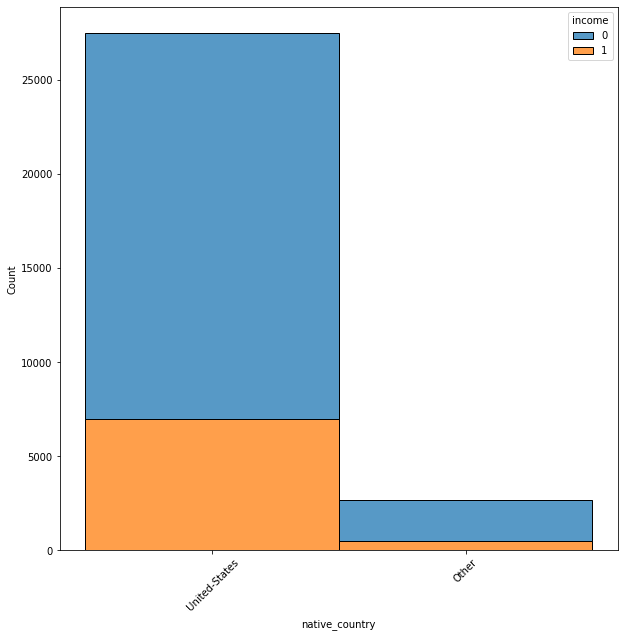

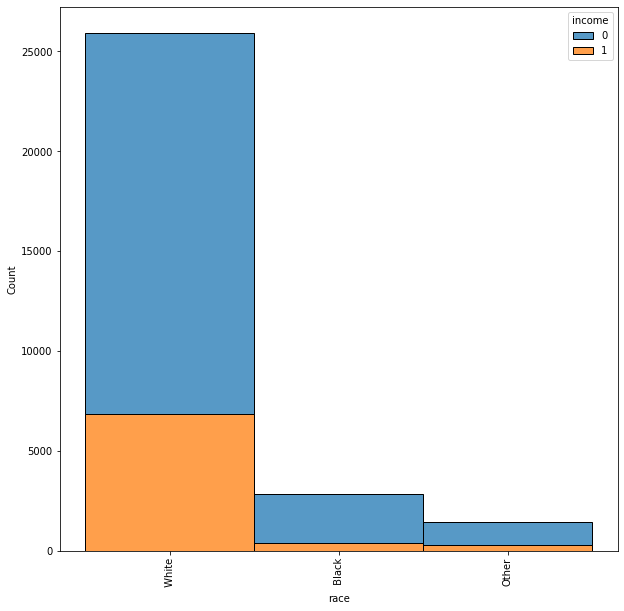

In [28]:
# Modifying native country labels
countries = np.array(data['native_country'].unique())
countries = np.delete(countries, 0)
data['native_country'].replace(countries, 'Other', inplace = True)

fig, ax = plt.subplots(figsize=(10,10))
sb.histplot(data=data, x="native_country", hue="income", multiple='stack', ax=ax);
plt.xticks(rotation=45);

# Modifying race labels
races = np.array(data['race'].unique())
races = np.delete(races, [0,1])
data['race'].replace(races, 'Other', inplace=True)

fig, ax = plt.subplots(figsize=(10,10))
sb.histplot(data=data, x="race", hue="income", multiple='stack', ax=ax);
plt.xticks(rotation=90);

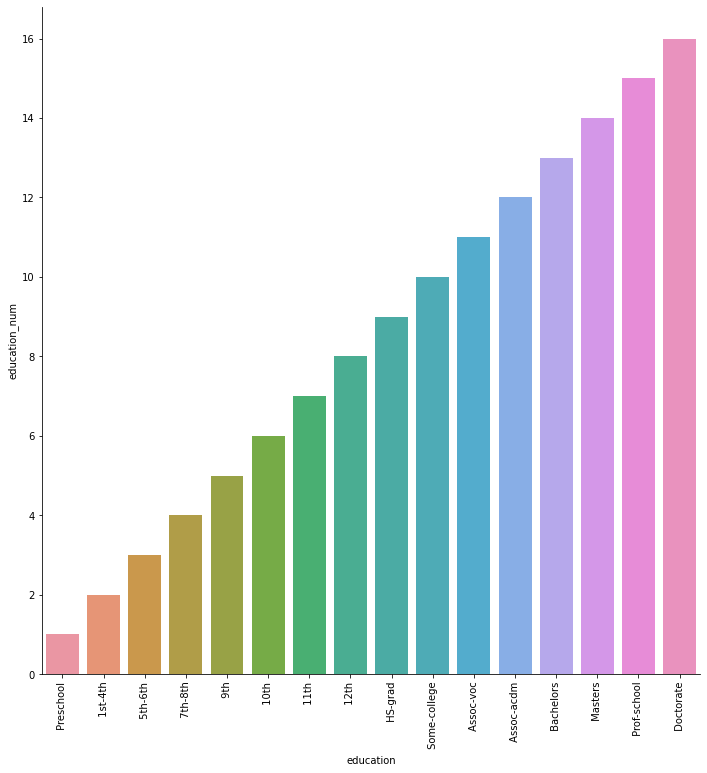

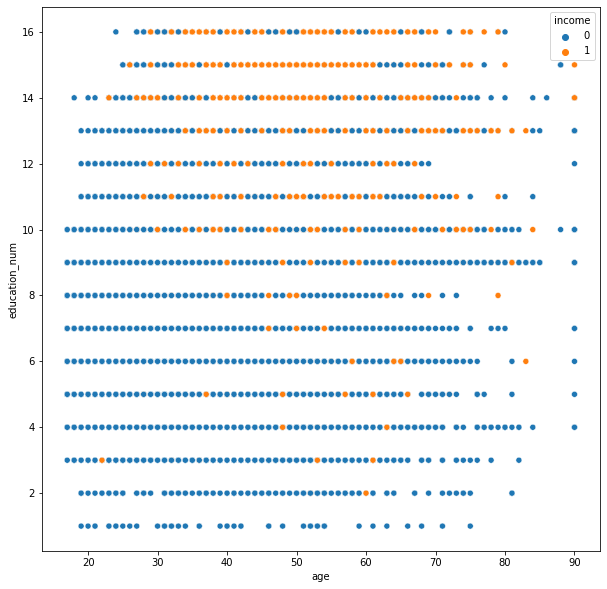

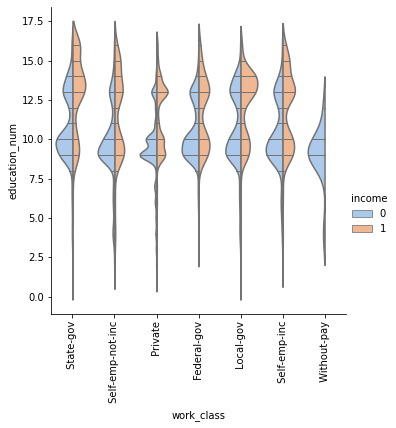

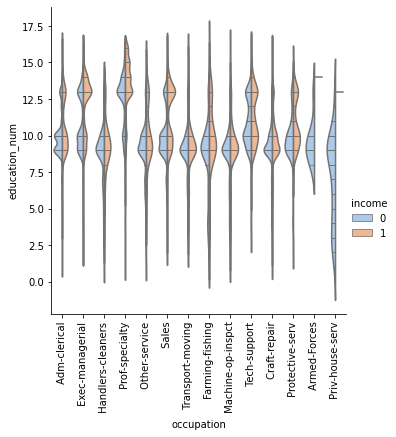

In [29]:
# Education vs number of years of education
sb.catplot(data=data, x="education", y="education_num", kind="bar", height=10, aspect=1, order=[' Preschool', ' 1st-4th',' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', ' HS-grad', ' Some-college', ' Assoc-voc',  ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school',' Doctorate']);
plt.xticks(rotation=90);

# Age vs number of years of education
fig, ax= plt.subplots(figsize=(10,10))
sb.scatterplot(x="age", y="education_num", data=data, hue="income", ax=ax);

# Working class vs number of years of education
sb.catplot(x="work_class", y="education_num", hue="income", palette='pastel', kind="violin", inner="stick", split=True, data=data);
plt.xticks(rotation='90');

# Occupation vs number of years of education
sb.catplot(x="occupation", y="education_num", hue="income", palette='pastel', kind="violin", inner="stick", split=True, data=data);
plt.xticks(rotation='90');

In [30]:
quantile = QuantileTransformer(output_distribution='normal')
cap_gain = np.array(data['capital_gain']).reshape((len(data['capital_gain']), 1))
data['capital_gain_gaussian'] = quantile.fit_transform(cap_gain)

quantile = QuantileTransformer(output_distribution='normal')
cap_loss = np.array(data['capital_loss']).reshape((len(data['capital_loss']), 1))
data['capital_loss_gaussian'] = quantile.fit_transform(cap_loss)

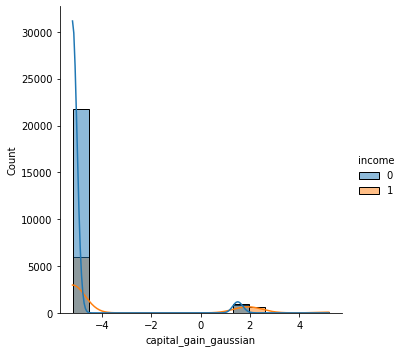

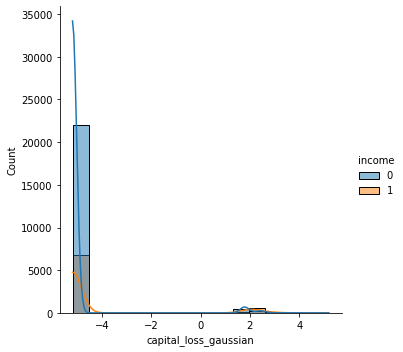

In [31]:
# Capital gain
sb.displot(data=data, x="capital_gain_gaussian", hue="income", kde=True);

# Capital loss
sb.displot(data=data, x="capital_loss_gaussian", hue="income", kde=True);

In [32]:
# Binning continuous variables
data['age_bins'] = pd.cut(data['age'], bins=10)
data['weight_bins'] = pd.cut(data['fnlwgt'], bins=10)
data['hours_bins']=pd.cut(data['hours_per_week'], bins=10)
data['education_num'] = pd.cut(data['education_num'], bins=10)
data['cap_gain_bins'] = pd.cut(data['capital_gain_gaussian'], bins=10)
data['cap_loss_bins'] = pd.cut(data['capital_loss_gaussian'], bins=10)

categories = ['education','education_num', 'work_class','marital_status','occupation','relationship','race','sex', 'native_country', 'cap_gain_bins', 'cap_loss_bins', 'age_bins', 'weight_bins','hours_bins']
for feature in categories:
  encoder = LabelEncoder()
  data[feature] = encoder.fit_transform(data[feature])

In [33]:
scaler = StandardScaler()

X_cat = data[['age_bins', 'work_class', 'weight_bins', 'education', 'education_num','marital_status','occupation','relationship','race','sex','hours_bins', 'cap_gain_bins', 'cap_loss_bins']]

X_cont = data[['age','work_class', 'fnlwgt','education', 'education_num','marital_status','occupation','relationship','race','sex','hours_per_week', 'capital_gain_gaussian', 'capital_loss_gaussian']]
X_cont = pd.DataFrame(scaler.fit_transform(X_cont), columns = ['age','work_class', 'fnlwgt', 'education', 'education_num','marital_status','occupation','relationship','race','sex','hours_per_week', 'capital_gain_gaussian', 'capital_loss_gaussian'])

Y = data['income']

## Building models and comparing their performance

In [34]:
def model_performance(model, X, Y):
  Y_pred = model.predict(X)
  print ("Accuracy = ", accuracy_score(Y_pred, Y))
  print ("Precision = ", precision_score(Y_pred, Y))
  print ("Recall = ", recall_score(Y_pred, Y))
  print ("F1 Score = ", f1_score(Y_pred, Y))
  fig,(ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(5,5))
  ax1.grid(False)
  plot_confusion_matrix(model, X, Y, ax=ax1);
  plot_roc_curve(model, X, Y, ax=ax2)

Accuracy =  0.8125325628759532
Precision =  0.753795886988276
Recall =  0.5943324746173663
F1 Score =  0.6646331130316895


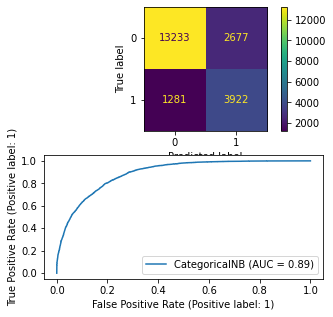

In [35]:
# Model 1 - Using categorical variables
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_cat, Y, test_size=0.3, random_state=3)
model1 = CategoricalNB()
model1.fit(X_train_1, Y_train_1)
model_performance(model1, X_train_1, Y_train_1)

Accuracy =  0.8032491829678398
Precision =  0.5791690599272449
Recall =  0.607307769524192
F1 Score =  0.592904743237946


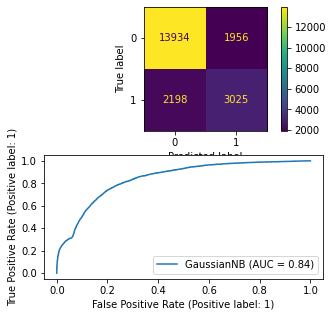

In [36]:
# Model 2 - Using normalized categorical and continuous variables
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_cont, Y, test_size=0.3, random_state=0)
model2 = GaussianNB()
model2.fit(X_train_2, Y_train_2)
model_performance(model2, X_train_2,Y_train_2)

## Testing the best model on test dataset

Accuracy =  0.824842524035805
Precision =  0.7770065075921909
Recall =  0.6257861635220126
F1 Score =  0.6932455970582543


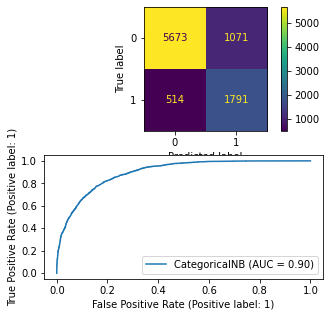

In [37]:
# Testing the categorical model on test data
model_performance(model1, X_test_1, Y_test_1)